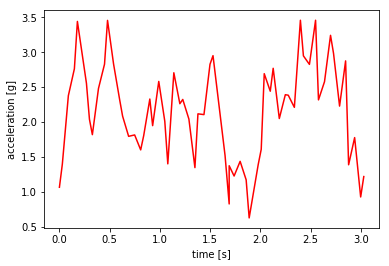

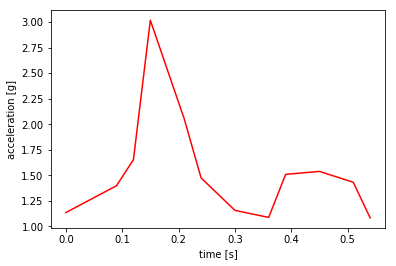

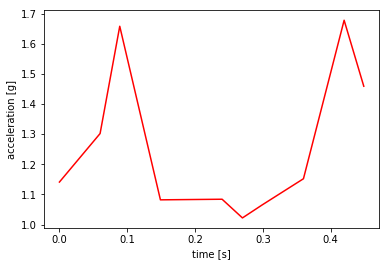

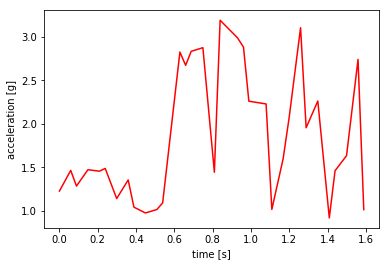

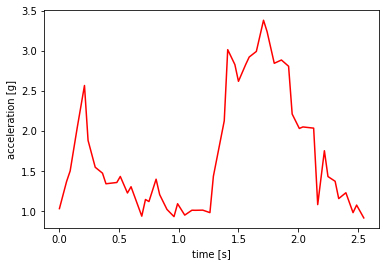

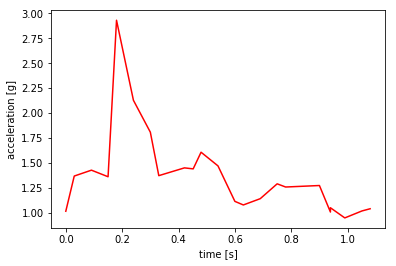

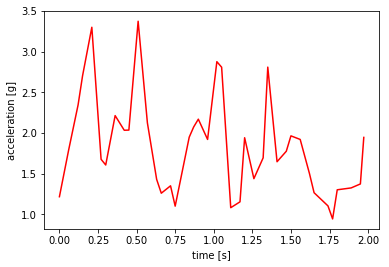

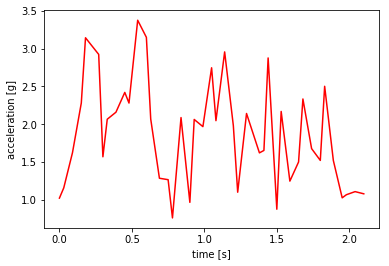

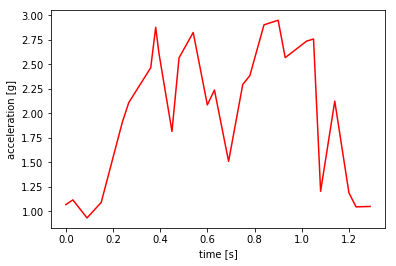

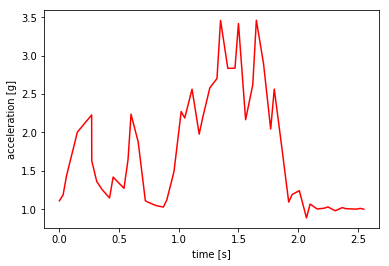

In [5]:
import os
import csv
import glob
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import pandas

df = pandas.read_csv('csv\KickSession_Accelerometer.csv', skiprows=4)
df.dropna(subset = ["Date"], inplace=True)
df2 = pandas.read_csv('csv/KickSession_Gyroscope.csv', skiprows=4)
df2.dropna(subset = ["Date"], inplace=True)

export_list = []
index = []

acc = df['X (mg)']**2 + df['Y (mg)']**2 + df['Z (mg)']**2
acc = np.sqrt(acc)
acc = acc.astype('int64')
pandas.set_option('display.max_rows', None)

foundStart = False
foundEnd = False

for i, j in enumerate(acc[:-1]):   

    if (j>1000)and(j < acc[i+1])and(foundStart == False): 
        start = i
        foundStart = True
        foundEnd = False
        #index.append(start)
    elif (j > acc[i+1])and(j < 1000)and(foundEnd == False)and(foundStart == True):
        end = i
        foundStart = False
        foundEnd = True
        #index.append(end)      
        
        acc_copy=acc.iloc[start:end]
        HostTime = df['HostTimestamp']
        HostTime=HostTime.iloc[start:end]
        HostTime = HostTime.astype('int64')
        HostTime -= HostTime[start]
        HostTime /= 1000
        acc_copy=np.array(acc_copy)/1000
        df2_copy=df2.iloc[start:end]

        HostTime = np.array(HostTime)
        
        export_list.append([acc_copy.mean(), acc_copy.std(), acc_copy.min(), acc_copy.max(), df2['X (dps)'].mean(), df2['X (dps)'].std(), df2['X (dps)'].min(), df2_copy['X (dps)'].max()
                   , df2_copy['Y (dps)'].mean(), df2_copy['Y (dps)'].std(), df2_copy['Y (dps)'].min(), df2_copy['Y (dps)'].max()
                   , df2_copy['Z (dps)'].mean(), df2_copy['Z (dps)'].std(), df2_copy['Z (dps)'].min(), df2_copy['Z (dps)'].max()])
        
        plt.plot(HostTime,acc_copy,'r-')
        plt.xlabel('time [s]')
        plt.ylabel('acceleration [g]')
        plt.show()

        
   
with open('Accelerometer_TestResult.csv', 'w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(["mean", "std", "min", "max", "GyrX_mean", "GyrX_std", "GyrX_min", "GyrX_max"
                    , "GyrY_mean", "GyrY_std", "GyrY_min", "GyrY_max"
                    , "GyrZ_mean", "GyrZ_std", "GyrZ_min", "GyrZ_max"])
    for row in export_list:
        writer.writerow(row)
    

ValueError: Unknown label type: 'continuous'

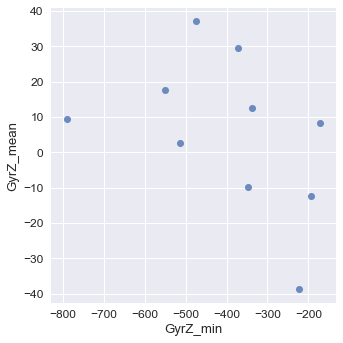

In [10]:
%matplotlib inline
import pandas as pd
from sklearn import svm
import numpy as np
import seaborn as sns; sns.set(font_scale=1.2)
import matplotlib.pyplot as plt

data = pd.read_csv('Accelerometer_TestResult.csv')

sns.lmplot('GyrZ_min', 'GyrZ_mean',
           data=data,
           #hue='kick_Type',
           #col='kick_Type',
           palette='Set1',
           fit_reg=False,
           scatter_kws={"s": 50});

X = data[['GyrZ_min','GyrZ_mean']].values
y = data['std']
model = svm.SVC(kernel='linear').fit(X, y)

sns.lmplot('GyrZ_min', 'GyrZ_mean',
           data=data,
           #hue='kick_Type',
           palette='Set1',
           fit_reg=False,
           scatter_kws={"s": 50});

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1

#---min and max for the second feature---
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

#---step size in the mesh---
#h = (x_max / x_min) / 20 

#---make predictions for each of the points in xx,yy---
xx, yy = np.meshgrid(np.arange(x_min, x_max),
                     np.arange(y_min, y_max))

Z = model.predict(np.c_[xx.ravel(), yy.ravel()])

#---draw the result using a color plot---
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.Blues, alpha=0.3)

plt.xlabel('GyrZ_min Z (dps)')
plt.ylabel('GyrZ_mean Z (dps)')
plt.title("Different kicking group")